In [16]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [17]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [18]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [19]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [20]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [21]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [22]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [23]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [59]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement).order_by(Measurement.date.desc()).first()
most_recent_date.__dict__



{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f95ae6138e0>,
 'tobs': 81.0,
 'id': 2724,
 'prcp': 0.0,
 'station': 'USC00519397',
 'date': '2017-08-23'}

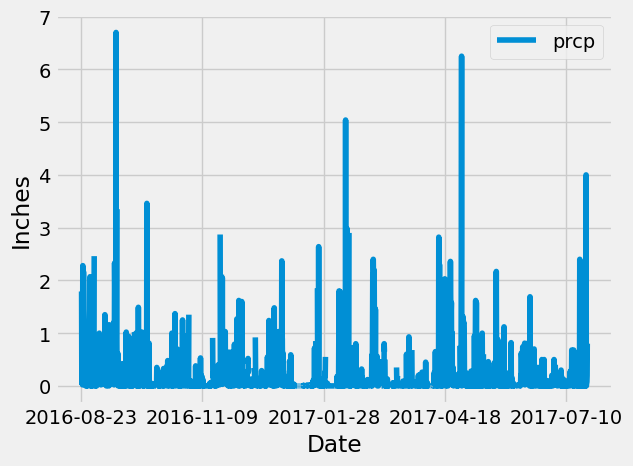

,_sa_instance_state,tobs,id,prcp,station,date
0,<sqlalchemy.orm.state.InstanceState object at ...,81.0,2364,0.00,USC00519397,2016-08-23
945,<sqlalchemy.orm.state.InstanceState object at ...,80.0,8825,NaN,USC00517948,2016-08-23
1433,<sqlalchemy.orm.state.InstanceState object at ...,77.0,14608,1.79,USC00519281,2016-08-23
667,<sqlalchemy.orm.state.InstanceState object at ...,80.0,7331,0.05,USC00514830,2016-08-23
1768,<sqlalchemy.orm.state.InstanceState object at ...,74.0,19202,0.70,USC00516128,2016-08-23
...,...,...,...,...,...,...
331,<sqlalchemy.orm.state.InstanceState object at ...,81.0,2695,0.00,USC00519397,2017-07-23
666,<sqlalchemy.orm.state.InstanceState object at ...,75.0,5425,0.06,USC00513117,2017-07-23
944,<sqlalchemy.orm.state.InstanceState object at ...,82.0,7608,0.07,USC00514830,2017-07-23
1767,<sqlalchemy.orm.state.InstanceState object at ...,82.0,14942,0.20,USC00519281,2017-07-23


In [144]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
date = session.query(Measurement).filter(Measurement.date >= "2016-08-23",Measurement.date <= "2017-07-23").first()

# Perform a query to retrieve the data and precipitation scores
last_12_months = session.query(Measurement).filter(Measurement.date >= "2016-08-23",Measurement.date <= "2017-07-23")
# Save the query results as a Pandas DataFrame. Explicitly set the column names
last_12_df = pd.DataFrame([row.__dict__ for row in last_12_months])

# Sort the dataframe by date
last_12_df = last_12_df.sort_values(by = "date")

# Use Pandas Plotting with Matplotlib to plot the data
last_12_df.plot(x = "date", y = "prcp")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()


In [86]:
# Use Pandas to calculate the summary statistics for the precipitation data
last_12_df["prcp"].describe()

count    1893.000000
mean        0.183323
std         0.473638
min         0.000000
25%         0.000000
50%         0.020000
75%         0.140000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [102]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station).count()
total_stations

9

In [121]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, \
    func.count(Measurement.station)).group_by(Measurement.station).order_by\
    (func.count(Measurement.station).desc()).all()


for station, count in active_stations:
    print(f'{station} , {count}')
    


USC00519281 , 2772
USC00519397 , 2724
USC00513117 , 2709
USC00519523 , 2669
USC00516128 , 2612
USC00514830 , 2202
USC00511918 , 1979
USC00517948 , 1372
USC00518838 , 511


In [198]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281").all()
most_active_temp_df = pd.DataFrame([row for row in most_active])

desc = pd.DataFrame(most_active_temp_df.describe())

avg_temp = desc.iloc[1, 0]
min_temp = desc.iloc[3, 0]
max_temp = desc.iloc[7, 0]

print(f'Min temp: {min_temp}, Max_temp: {max_temp}, Avg temp: {avg_temp}')

Min temp: 54.0, Max_temp: 85.0, Avg temp: 71.66378066378067


Text(0.5, 4.183333333333314, 'Temperature')

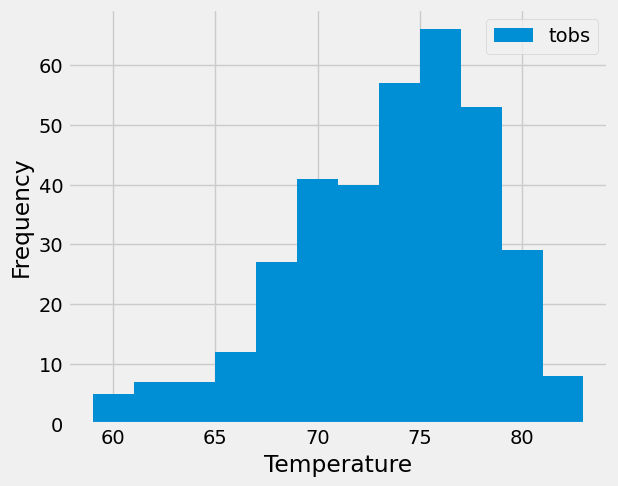

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()